In [1]:
import pandas as pd
from pandas  import read_excel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# feature engineering 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split



#model
from sklearn.tree import DecisionTreeClassifier

#accruarcy
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,auc

In [2]:
data=pd.read_excel(r'heart_disease.xlsx', engine='openpyxl',sheet_name=1)

# Understanding the Dataset and Handling the  null values

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
data.shape
# shape of the data is 908 row  and 13 columns

(908, 13)

In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
# cleaning the data and again storing to back in data
data=data.dropna()

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
# stastical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,846.0,53.425532,9.099243,29.0,47.00,54.0,60.00,77.0
trestbps,846.0,132.449173,19.243667,0.0,120.00,130.0,140.00,200.0
chol,846.0,202.652482,111.654072,0.0,177.25,225.0,269.75,603.0
thalch,846.0,137.167849,25.608434,60.0,120.00,140.0,156.00,202.0
oldpeak,846.0,0.891253,1.093875,-2.6,0.00,0.5,1.50,6.2
num,846.0,0.979905,1.128783,0.0,0.00,1.0,2.00,4.0


# Lets handel the outliears


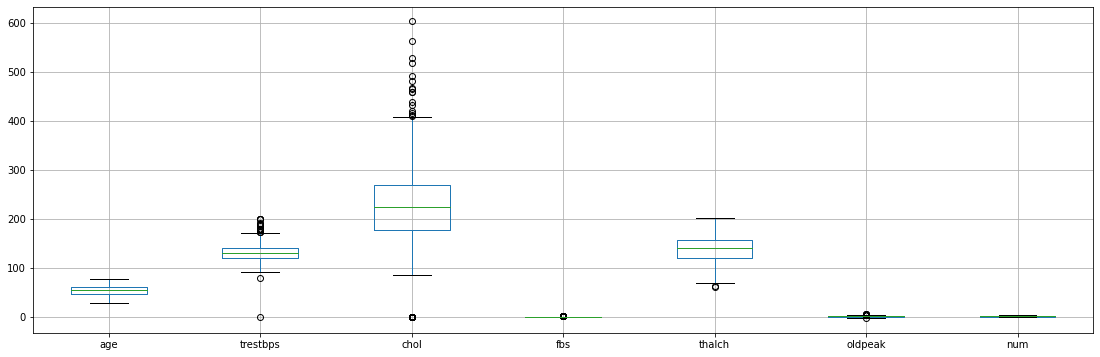

In [9]:
# for visualization the outliear we are using bos plot 
data.boxplot(figsize=(19,6))
plt.show()

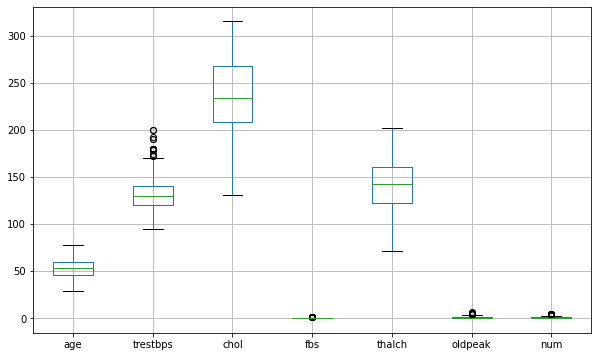

In [10]:
# removing the outliear to the chol 
Q1=data["chol"].quantile(0.25)
Q3=data["chol"].quantile(0.75)

IQR=Q3-Q1
lower_bound=Q1-0.5*IQR
upper_bound=Q3+0.5*IQR
data=data[
(data["chol"]>=lower_bound) & (data["chol"]<=upper_bound)
    ]
    

data.boxplot(figsize=(10,6))
plt.show()

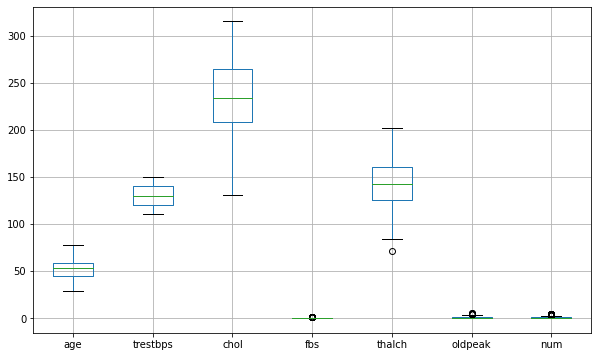

In [11]:
# removing the outliear to the trestbps
Q1=data["trestbps"].quantile(0.25)
Q3=data["trestbps"].quantile(0.75)

IQR=Q3-Q1
lower_bound=Q1-0.5*IQR
upper_bound=Q3+0.5*IQR
data=data[
(data["trestbps"]>=lower_bound) & (data["trestbps"]<=upper_bound)
    ]
    
data.boxplot(figsize=(10,6))
plt.show()
    

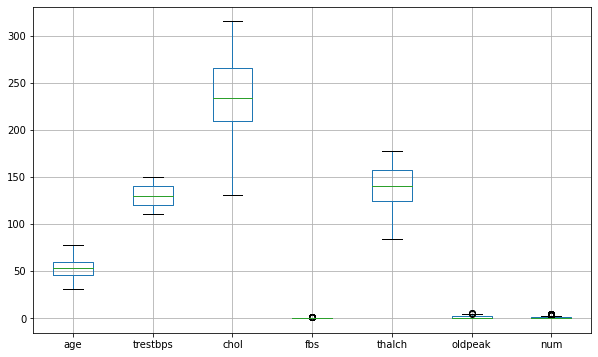

In [12]:
# removing the outliear to the trestbps
Q1=data["thalch"].quantile(0.25)
Q3=data["thalch"].quantile(0.75)

IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+0.5*IQR
data=data[
(data["thalch"]>=lower_bound) & (data["thalch"]<=upper_bound)
    ]
    
data.boxplot(figsize=(10,6))
plt.show()
    

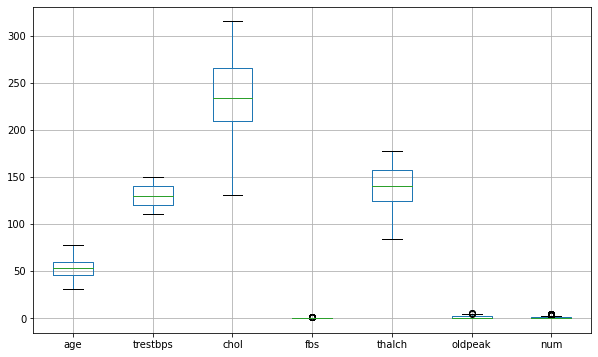

In [13]:
# all the outliear has been eliminated now we can analysis furthur
data.boxplot(figsize=(10,6))
plt.show()

# Feature Engineering 


In [14]:
#label encoding for the categorical columns
numerical,categorical=[],[]
for col in data.columns:
    if data[col].dtype in ["int64","float"]:
        numerical.append(col)
    else:
        categorical.append(col)

In [15]:
print(f"the numerical columns are {numerical}")
print(f"the  categories columns are {categorical}")

the numerical columns are ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
the  categories columns are ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [16]:
for col in categorical:
    label_encoding=LabelEncoder()
    data[col]=label_encoding.fit_transform(data[col])

    


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 899
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       466 non-null    int64  
 1   sex       466 non-null    int32  
 2   cp        466 non-null    int32  
 3   trestbps  466 non-null    int64  
 4   chol      466 non-null    int64  
 5   fbs       466 non-null    int64  
 6   restecg   466 non-null    int32  
 7   thalch    466 non-null    int64  
 8   exang     466 non-null    int32  
 9   oldpeak   466 non-null    float64
 10  slope     466 non-null    int32  
 11  thal      466 non-null    int32  
 12  num       466 non-null    int64  
dtypes: float64(1), int32(6), int64(6)
memory usage: 40.0 KB


In [18]:
# feature enginerring 
X=data.drop("num",axis=1)
Y=data["num"]

In [19]:
# splititng the data
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
# applying the standard scaling technique so that all the columns will equally contribute to the model 
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(x_test)

In [21]:
x_test

X_train

array([[-0.54406256,  0.55664994, -0.90280802, ...,  1.10505818,
        -0.21109842, -1.53604658],
       [-1.58196651, -1.79646117,  1.25696422, ..., -0.80739422,
        -0.21109842, -0.21027088],
       [ 0.14787341,  0.55664994, -0.90280802, ...,  1.10505818,
        -0.21109842, -0.21027088],
       ...,
       [ 0.26319607,  0.55664994, -0.90280802, ...,  1.58317127,
         1.27057353, -1.53604658],
       [ 0.60916406,  0.55664994, -0.90280802, ...,  2.06128437,
        -0.21109842,  1.11550483],
       [ 1.41642269,  0.55664994, -0.90280802, ..., -0.42490374,
         1.27057353,  1.11550483]])

In [22]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)

In [23]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [24]:
model.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [25]:
y_pred=model.predict(x_test)

In [26]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8191489361702128


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       0.73      0.85      0.79        26
           2       0.88      0.70      0.78        10
           3       1.00      0.10      0.18        10
           4       0.43      0.75      0.55         4

    accuracy                           0.82        94
   macro avg       0.79      0.68      0.65        94
weighted avg       0.85      0.82      0.79        94



In [29]:
# we have a multiclasses of classification 
# while trying to calculate the ruc auc is showing error of multiclass
roc_auc=roc_auc_score(y_test,y_pred)
print("ROC-AUC SCORE:",roc_auc)

ValueError: multi_class must be in ('ovo', 'ovr')

# Hyperparameter Tuning:

## we already used citerian now we are going to use the max_Depth,minimum simple split
### we have grind search approches  for using the hyperperameter tunning

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5],
    'min_simple_split':[2,5,10]
}



model2=DecisionTreeClassifier(random_state=42)
# perform grid search with cross-validation
grid_serch=GridSearchCV(estimator=model2,param_grid=param_grid,cv=5,scoring="accuracy",verbose=1)
grid_serch.fit(X,Y)

#best hyperperameters and score
print("best Perameters:",grid_search.best_params_)
print("Best Score:",grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


ValueError: Invalid parameter min_simple_split for estimator DecisionTreeClassifier(max_depth=2, random_state=42). Check the list of available parameters with `estimator.get_params().keys()`.

NameError: name 'estimator' is not defined